In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
columns = list(df.columns)
print(columns)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
X = df.drop("target",axis=1)
y = df['target']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Decision Tree

In [9]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
y_pred = model.predict(X_test_scaled)

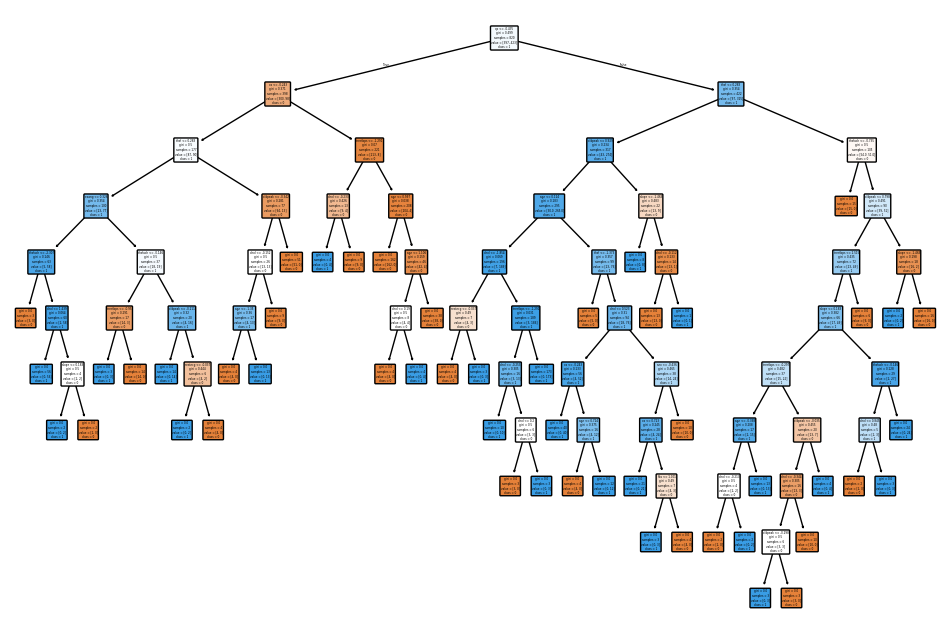

In [11]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(model,feature_names=X.columns.tolist(),class_names=[str(cls) for cls in set(y)],filled=True,rounded=True)
plt.show()

In [12]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy is: ',round(accuracy,4)*100,"%")

Accuracy is:  98.54 %


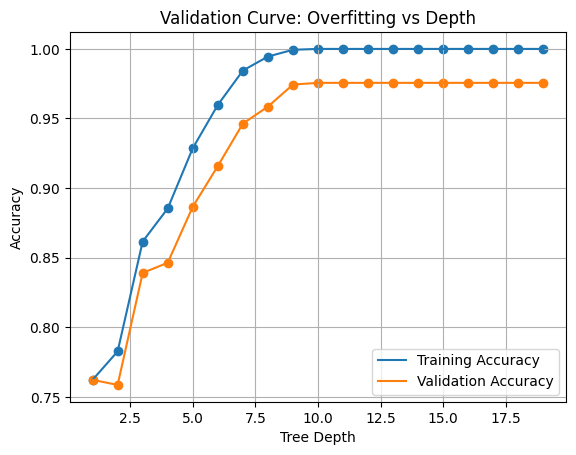

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
depth_range = range(1, 20)
train_scores, val_scores = validation_curve(
    model,
    X_train_scaled, y_train,
    param_name="max_depth",
    param_range=depth_range,
    cv=5,
    scoring="accuracy"
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.scatter(depth_range, train_mean)
plt.plot(depth_range, train_mean, label="Training Accuracy")
plt.plot(depth_range, val_mean, label="Validation Accuracy")
plt.scatter(depth_range, val_mean)

plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Validation Curve: Overfitting vs Depth")
plt.legend()
plt.grid(True)
plt.show()

### Random Forest 

In [14]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop("target",axis=1)
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model1 = RandomForestClassifier()
model1.fit(X_train_scaled,y_train)

RandomForestClassifier()

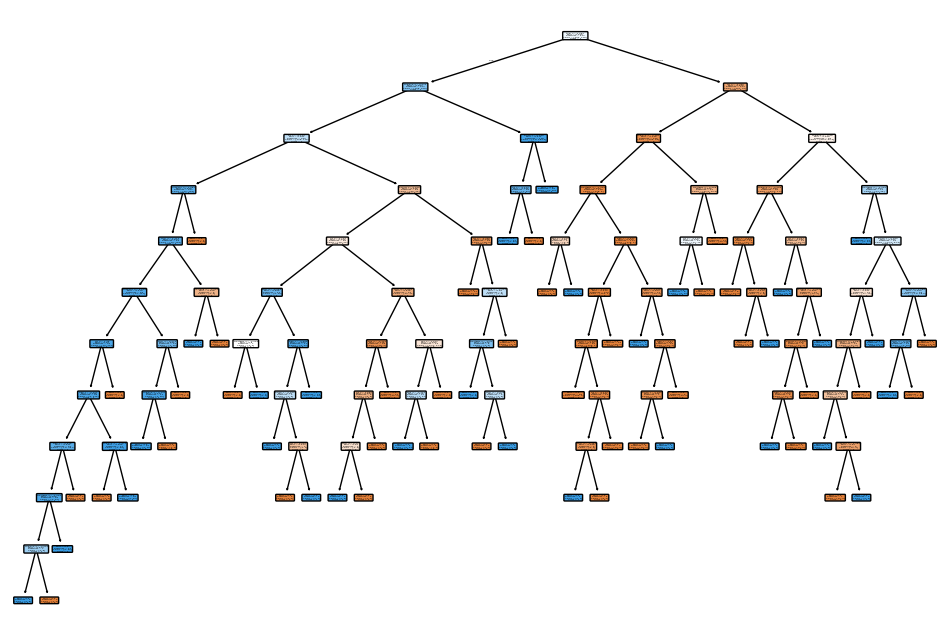

In [15]:
model1_estimator = model1.estimators_[0]
plt.figure(figsize=(12,8))
plot_tree(model1_estimator,feature_names=X.columns.tolist(),class_names=[str(cls) for cls in set(y)],filled=True,rounded=True)
plt.show()

### Comparing accuracies of Decision Tree and Random Forest

#### 1. Decision Tree accuracy

In [16]:
train_acc = model.score(X_train_scaled,y_train)
test_acc = model.score(X_test_scaled,y_test)
print(f"Training Accuracy: {train_acc*100:.2f}")
print(f"Test Accuracy: {test_acc*100:.2f}")

Training Accuracy: 100.00
Test Accuracy: 98.54


#### 2. Random Forest accuracy

In [17]:
train_acc = model1.score(X_train_scaled,y_train)
test_acc = model1.score(X_test_scaled,y_test)
print(f"Training Accuracy: {train_acc*100:.2f}")
print(f"Test Accuracy: {test_acc*100:.2f}")

Training Accuracy: 100.00
Test Accuracy: 98.54


Text(0.5, 1.0, 'Feature Correlation Heatmap')

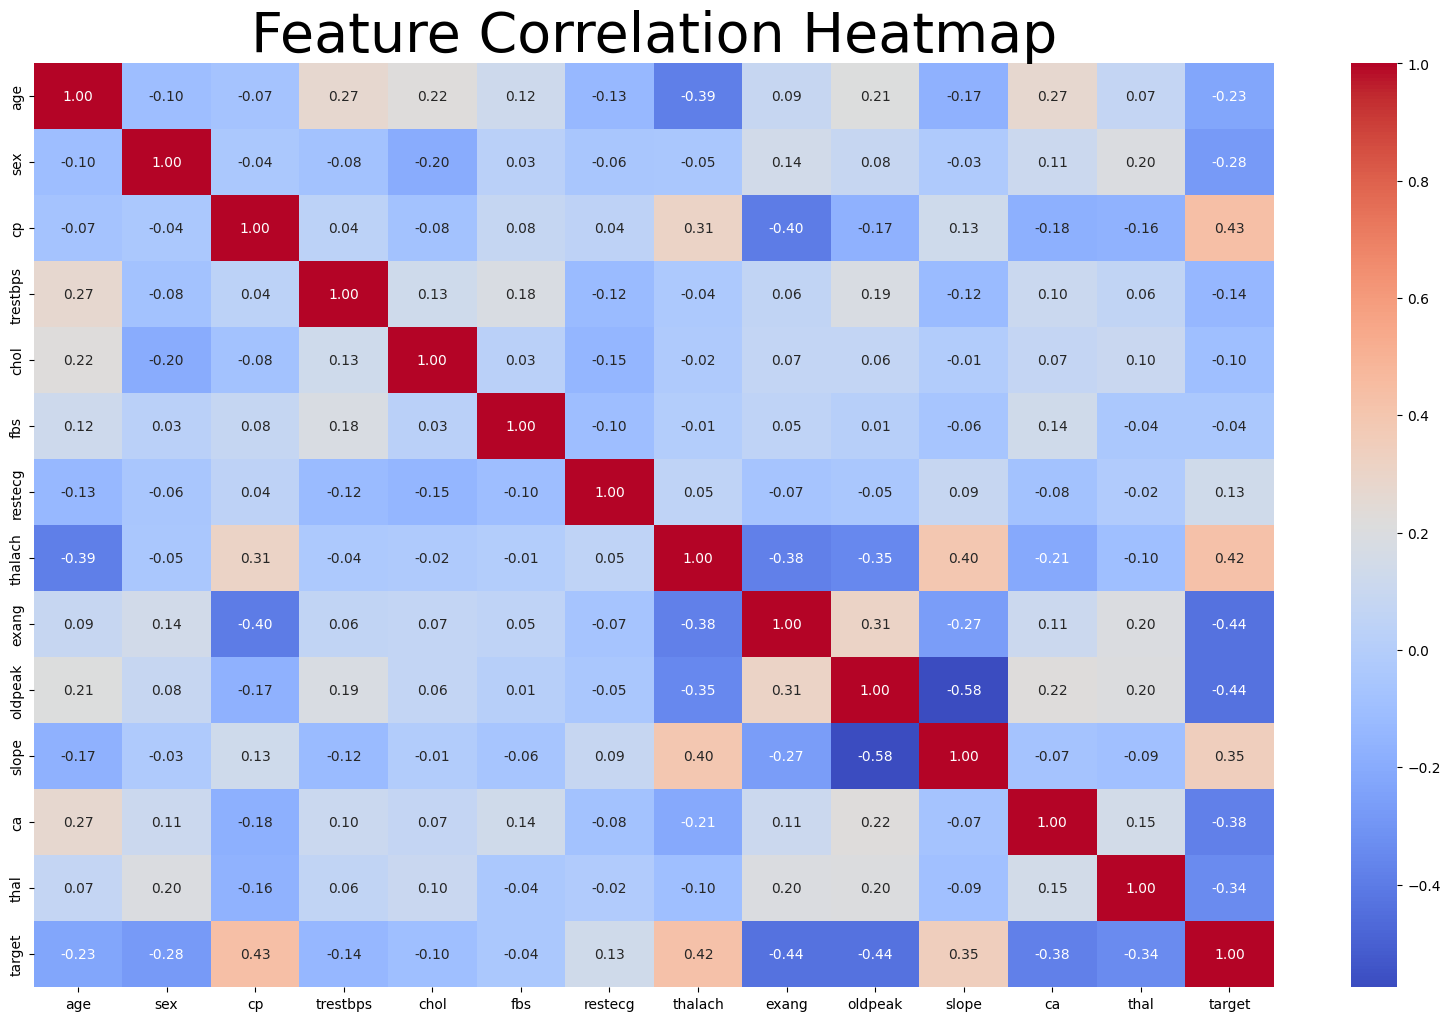

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Feature Correlation Heatmap',fontsize=40)

### Feature Importances

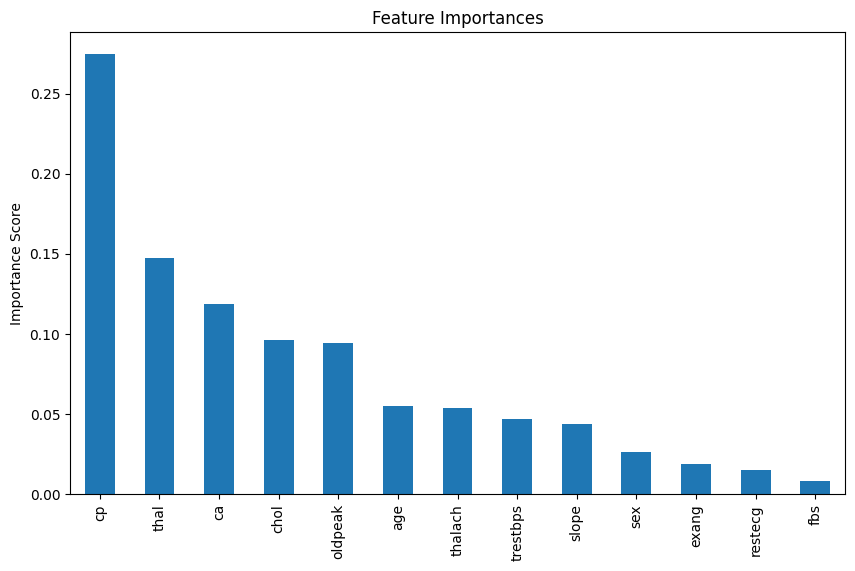

In [19]:
importances = model.feature_importances_

feat_importances = pd.Series(importances,index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_importances.plot(kind='bar')
plt.title("Feature Importances")
plt.ylabel("Importance Score")
plt.show()

In [20]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(model, X, y, cv=5, scoring='accuracy') # performs 5 fold cross validation

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

print("\n")
scores = cross_val_score(model1, X, y, cv=5, scoring='accuracy') # performs 5 fold cross validation

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0
Standard deviation: 0.0


Cross-validation scores: [1.         1.         1.         1.         0.98536585]
Mean accuracy: 0.9970731707317073
Standard deviation: 0.005853658536585371
